# Entrega I --  Novos Piratas em Data Science
## Análise de vendas do Walmart

Bibliotecas que serão utilizadas nesta entrega:

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Importando os dados para análise

In [11]:
df = pd.read_csv('train.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


### Pré-análise dos dados

Compreendendo melhor o conjunto de dados

In [12]:
df.shape

(421570, 5)

In [275]:
df.dtypes

Store            object
Dept             object
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

Convertendo alguns tipode dados para os desejados:

In [237]:
df['Store'] = df['Store'].astype('str')
df['Dept'] = df['Dept'].astype('str')

In [238]:
df.dtypes

Store            object
Dept             object
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

Observando variáveis numéricas, descritivas e categóricas separadamente. Não há nenhum dado faltando.

In [241]:
df[{'Store','Dept','Date'}].describe()

,Store,Dept,Date
count,421570,421570,421570
unique,45,81,143
top,13,2,2011-12-23
freq,10474,6435,3027


In [245]:
df['IsHoliday'].describe()

count     421570
unique         2
top        False
freq      391909
Name: IsHoliday, dtype: object

In [242]:
df.describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


## **Exercício 1**

**Plote o gráfico do desempenho médio semanal (média de todas as lojas) ao longo do período catalogado. Qual é o melhor tipo de gráfico para expor essa informação? Por quê?**

Primeiro, agregamos nossos dados de maneira a termos os dados de desempenho médio semanal das lojas ao longo do período.

In [246]:
media_lojas = df.groupby(by = 'Date').agg({'Weekly_Sales':'mean'})
media_lojas.head()

,Weekly_Sales
Date,
2010-02-05,16836.121997
2010-02-12,16352.056032
2010-02-19,16216.658979
2010-02-26,14899.549688
2010-03-05,15921.015727


Por se tratar de uma variável do tipo temporal, a melhor forma de mostrá-los é a partir de um gráfico de linha, de área, ou ainda um gráfico de pontos que dê a noção de passagem de tempo. Esses tipos são os mais adequados justamente por permitirem uma análise temporal dos dados, dando noção de passagem de tempo. Vamos testar algumas vizualizações.

([<matplotlib.axis.XTick at 0x22c4cbf0>,
 <a list of 36 Text xticklabel objects>)

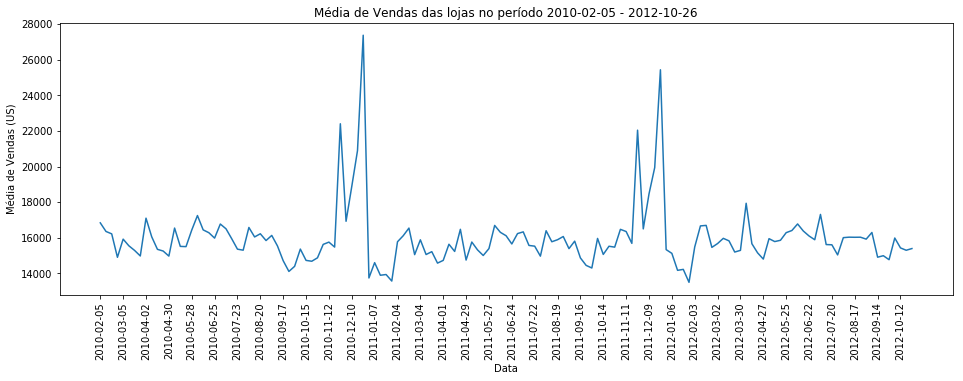

In [247]:
stick = pd.Series.tolist(media_lojas.index) # armazenando os valores em uma lista
x = [stick[i] for i in range(len(stick)) if not i%4 ] # pegando as labels a cada 4 semanas
#x.append(max(stick))    # poderia adicionar o ultimo valor à lista

fig = plt.figure(figsize = (16,5))
plt.plot(media_lojas)
plt.title('Média de Vendas das lojas no período 2010-02-05 - 2012-10-26')
plt.xlabel('Data')
plt.ylabel('Média de Vendas (US)')
plt.xticks(x, rotation = 90)

Nesse primeiro gráfico de linha se percebe que em dois grandes momentos do período as vendas aumentam consideravelente. Por se tratar de um comercio de varejo, podemos pensar que isso deve ocorrer devido a grandes eventos sazonais, como o natal, ano novo ou black friday.

No gráfico de área abaixo percebemos que ele é mais palpável e "verdadeiro" do que o anterior, pois o eixo y começa do valor 0. Assim, percebemos este retrata melhor o cenário real, enquanto o anterior permite que identifiquemos melhor quais são os pontos que se destacam no período.

<Figure size 1008x360 with 0 Axes>

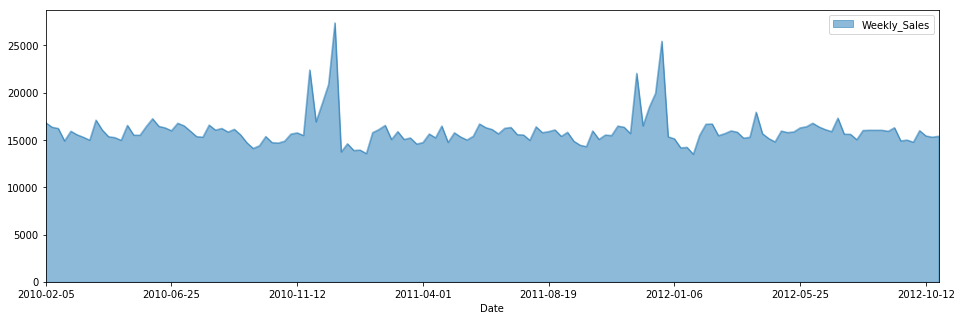

In [248]:
plt.figure(figsize = (14,5), linewidth = 3.5)
media_lojas.plot.area(stacked = False, figsize = (16,5), legend = 'Vendas')

## **Exercício 2**

**Encontre o conjunto de 10 lojas que melhor perfomaram. Plote o gráfico de desempenho médio dessas lojas no período disponível.**

O conjunto de melhores lojas pode ser encontrando definindo-se quais são os critérios que fazem com que uma loja efetivamente venda mais e melhor do que as outras. Uma das formas disso ser conseguido comparando-se valores de venda brutos por semana.
A análise pode vir a ser ainda mais profunda, cruzando variáveis. No nosso caso, as variáveis que temos disponíveis para realizar algum cruzamento é departamento de vendas e se é feriado ou não. Assim, podemos escolher:

- Lojas que performam bem em dados brutos(vendas totais no período); 

- Lojas que tem em média uma venda semanal bruta maior do que as outras, indicando estabilidade e consistencia ao longo do tempo; 

- quebrar em lojas que vendem melhor tais tipos de produtos, indicando algum comportamento local que pode ser aproveitado; 

- lojas que vendem melhor quando não é feriado, indicando estabilidade.

- E lojas que se sobressaem em feriados, mostrando que são as mais afetadas por campanhas promocionais.

É natural que as lojas consideradas "melhores" da companhia apareçam no topo do ranking de muitas dessas formas de se encontrar "a loja que performa melhor", e são elas quem queremos encontrar. Ademais, cada uma dessas categorias é extremamente útil para áreas específicas da companhia

Neste ponto, buscaremos as lojas que performam bem em dados brutos, as que melhor perfomam quando não é feriado e as lojas que melhor vendem nas top 5 categorias da companhia. Assim encontraremos as que possuem uma venda consistente e estável nas áreas que mais trazem renda e em períodos em que não se espera que as lojas vendam mais por algum fator externo.

### Top lojas em valor bruto, na soma e em media

Filtrando o nosso Dataframe para soma e média dos valores de venda semanal:

In [421]:
#Soma
top_bruta_soma = df.groupby(by = 'Store').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = False).head(15)
top_bruta_soma

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [422]:
#Media
top_bruta_media = df.groupby(by = 'Store').agg({'Weekly_Sales':'mean'}).sort_values(by = 'Weekly_Sales', ascending = False).head(15)
top_bruta_media

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


### Top lojas em valor bruto excluindo feriados, na soma e em media

Fazendo o filtro de exclusão de feriados:

In [268]:
df[df['IsHoliday'] == False].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False


Filtrando o nosso Dataframe para soma e média dos valores de venda semanal:

In [423]:
#soma
top_notFeriado_soma = df[df['IsHoliday'] == False].groupby(by = 'Store').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = False).head(15)
top_notFeriado_soma

,Weekly_Sales
Store,
20,2.789074e+08
4,2.771129e+08
14,2.677941e+08
13,2.653873e+08
2,2.545898e+08
10,2.504802e+08
27,2.349329e+08
6,2.069471e+08
1,2.057453e+08


In [424]:
#Media
top_notFeriado_media = df[df['IsHoliday'] == False].groupby(by = 'Store').agg({'Weekly_Sales':'mean'}).sort_values(by = 'Weekly_Sales', ascending = False).head(15)
top_notFeriado_media

,Weekly_Sales
Store,
20,29386.517928
4,29032.260570
14,28680.955485
13,27261.146969
2,26753.864227
10,26116.166656
27,24714.172533
6,21806.854728
1,21609.634733


Comparando rapidamente com as lojas obtidas do grupo anterior, percebemos que não há alteração no padrão de lojas.

### Top lojas por categora, na soma e na media

Primeiro, descobrindo quais são as categorias que possuem melhor venda:

In [425]:
df.groupby(by = 'Dept').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = False).head(10)

,Weekly_Sales
Dept,
92,4.839433e+08
95,4.493202e+08
38,3.931181e+08
72,3.057252e+08
90,2.910685e+08
40,2.889360e+08
2,2.806112e+08
91,2.167817e+08
13,1.973216e+08


As top 5 categorias que mais rendem são as 92, 95, 38, 72 e 90.

In [426]:
filtro = (df['Dept'] == '92') | (df['Dept'] == '95') | ( df['Dept'] == '38')| ( df['Dept'] == '72')| ( df['Dept'] == '90')
fat_top = df[filtro]['Weekly_Sales'].sum()
fat_totas = df['Weekly_Sales'].sum()
perc_das_vendas = fat_top/fat_outras
perc_das_vendas

0.28545535789760135

E essas 5 categorias correnspondem a cerca de 28,55% das vendas totais no período. Agora, com essa informação e os filtro feitos, observamos quais são as categorias que melhor perfomam no período, por categoria:

In [427]:
# Soma
top_categoria_soma = df[filtro].groupby(by = 'Store').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = False).head(15)
top_categoria_soma

,Weekly_Sales
Store,
14,90326020.46
20,87702095.02
4,82538019.00
13,82235886.11
2,80664156.81
27,67305131.12
1,66641924.92
31,63841719.87
19,61341340.70


In [428]:
# Média
top_categoria_media = df[filtro].groupby(by = 'Store').agg({'Weekly_Sales':'mean'}).sort_values(by = 'Weekly_Sales', ascending = False).head(15)
top_categoria_media

,Weekly_Sales
Store,
14,126330.098545
20,122660.272755
4,115437.788811
13,115015.225329
2,112817.002531
27,94133.050517
1,93205.489399
31,89289.118699
19,85792.084895


### Combinando resultados

Agora, com os três tópicos análisados e resultados obtidos, podemos cruzá-los para definir quais são as 10 top lojas. Os resultados reespectivos de cada categoria estão armazenados em:

In [429]:
top_bruta_soma.index
top_bruta_media.index
top_notFeriado_soma.index
top_notFeriado_media.index
top_categoria_soma.index
top_categoria_media.index

Index(['14', '20', '4', '13', '2', '27', '1', '31', '19', '24', '6', '39',
       '41', '10', '28'],
      dtype='object', name='Store')

E então podemos unir os resultados de maneira ordenada em um único Dataframe, que nos permita visualizar lojas que estão presentes em categorias distintas. As que aparecerem em melhor colocação nas categorias, e em mais categorias, serão as campeãs. 

Inicializando um novo DataFrame:

In [430]:
comparacao = pd.DataFrame()

Adicionando os dados de maneira ordenada ao Dataframe:

In [431]:
comparacao['Bruta_soma'] = (top_bruta_soma.index.astype('int64'))
comparacao['Bruta_media'] = (top_bruta_media.index.astype('int64'))
comparacao['nFeriado_soma'] = (top_notFeriado_soma.index.astype('int64'))
comparacao['nFeriado_media'] = (top_notFeriado_media.index.astype('int64'))
comparacao['Categoria_soma'] = (top_categoria_soma.index.astype('int64'))
comparacao['Categoria_media'] = (top_categoria_media.index.astype('int64'))

Mostrando o resultado:

In [432]:
comparacao

,Bruta_soma,Bruta_media,nFeriado_soma,nFeriado_media,Categoria_soma,Categoria_media
0,20,20,20,20,14,14
1,4,4,4,4,20,20
2,14,14,14,14,4,4
3,13,13,13,13,13,13
4,2,2,2,2,2,2
5,10,10,10,10,27,27
6,27,27,27,27,1,1
7,6,6,6,6,31,31
8,1,1,1,1,19,19
9,39,39,39,39,24,24


Neste momento, caso houvesse alguma preferência entre as categorias, poderiam ser definidos pesos para cada uma delas, destacando lojas que performaram mais em determinados critérios de seleção. 

Como o exercício deixa aberto o conceito do é ser uma loja que perfoma melhor, selecionaremos as lojas que estão mais presentes nas categorias e em maior ranking. Temos que as lojas que melhor performaram no período são, reespectivamente:


1ª | 2ª | 3ª | 4ª | 5ª | 6ª | 7ª | 8ª | 9ª | 10ª
--|---|---|---|----|----|----|----|----|----
20 | 4 | 14 | 13 | 2 | 10 | 27 | 1 | 6 | 19

## **Exercício 3**

**Faça o mesmo que foi proposto no exercício 2, mas agora com as 10 lojas que pior performaram.**

De maneira análoga ao que foi realizado no exercício anterior, buscaremos as lojas que pior performam em dados brutos, as que pior perfomam quando não é feriado e as lojas que possuem pior venda nas top 5 categorias da companhia. 


### Botton lojas em valor bruto, na soma e em media

Filtrando o nosso Dataframe para soma e média dos valores de venda semanal:

In [433]:
#Soma
botton_bruta_soma = df.groupby(by = 'Store').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = True).head(15)
botton_bruta_soma

,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42
3,57586735.07
30,62716885.12
37,74202740.32
16,74252425.40


In [434]:
#Media
botton_bruta_media = df.groupby(by = 'Store').agg({'Weekly_Sales':'mean'}).sort_values(by = 'Weekly_Sales', ascending = True).head(15)
botton_bruta_media

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


### Botton lojas em valor bruto excluindo feriados, na soma e em media

Fazendo o filtro de exclusão de feriados:

In [404]:
df[df['IsHoliday'] == False].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False


Filtrando o nosso Dataframe para soma e média dos valores de venda semanal:

In [435]:
#soma
botton_notFeriado_soma = df[df['IsHoliday'] == False].groupby(by = 'Store').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = True).head(15)
botton_notFeriado_soma

,Weekly_Sales
Store,
33,34534276.77
44,40332731.83
5,41880672.83
36,49735808.67
38,51344527.64
3,53208624.57
30,58348292.05
16,68585088.94
37,69127489.82


In [436]:
#Media
botton_notFeriado_media = df[df['IsHoliday'] == False].groupby(by = 'Store').agg({'Weekly_Sales':'mean'}).sort_values(by = 'Weekly_Sales', ascending = True).head(15)
botton_notFeriado_media

,Weekly_Sales
Store,
5,5010.249172
33,5723.280870
44,6046.886331
3,6332.098604
38,7493.363637
16,7820.420632
29,8088.309482
7,8254.246774
36,8597.374014


Comparando rapidamente com as lojas obtidas do grupo anterior, percebemos que não há alteração no padrão de lojas.

### Botton lojas por categora, na soma e na media


Como visto anteriormente, as top 5 categorias que mais rendem são as 92, 95, 38, 72 e 90, e correnspondem a cerca de 28,55% das vendas totais no período. 

Agora, com essa informação e os filtro feitos, observamos quais são as categorias que pior perfomam no período, por categoria:

In [437]:
# Soma
botton_categoria_soma = df[filtro].groupby(by = 'Store').agg({'Weekly_Sales':'sum'}).sort_values(by = 'Weekly_Sales', ascending = True).head(15)
botton_categoria_soma

,Weekly_Sales
Store,
5,13873249.47
33,14255783.51
36,19722155.89
16,19853114.31
29,20560993.06
15,20794738.36
44,21133061.26
7,21612881.76
3,22343618.20


In [438]:
# Média
botton_categoria_media = df[filtro].groupby(by = 'Store').agg({'Weekly_Sales':'mean'}).sort_values(by = 'Weekly_Sales', ascending = True).head(15)
botton_categoria_media

,Weekly_Sales
Store,
5,19403.146112
33,24663.985311
16,27766.593441
29,28756.633650
15,29083.550154
44,29556.729035
7,30227.806657
3,31249.815664
21,31308.469832


### Combinando resultados

Agora, com os três tópicos análisados e resultados obtidos, podemos cruzá-los para definir quais são as 10 top lojas. Os resultados reespectivos de cada categoria estão armazenados em:

In [439]:
botton_bruta_soma.index
botton_bruta_media.index
botton_notFeriado_soma.index
botton_notFeriado_media.index
botton_categoria_soma.index
botton_categoria_media.index

Index(['5', '33', '16', '29', '15', '44', '7', '3', '21', '9', '36', '38',
       '25', '12', '30'],
      dtype='object', name='Store')

E então podemos unir os resultados de maneira ordenada em um único Dataframe, que nos permita visualizar lojas que estão presentes em categorias distintas. As que aparecerem em melhor colocação nas categorias, e em mais categorias, serão as campeãs. 

Inicializando um novo DataFrame:

In [440]:
comparacao_botton = pd.DataFrame()

Adicionando os dados de maneira ordenada ao Dataframe:

In [441]:
comparacao_botton['Bruta_soma'] = botton_bruta_soma.index.astype('int64')
comparacao_botton['Bruta_media'] = botton_bruta_media.index.astype('int64')
comparacao_botton['nFeriado_soma'] = botton_notFeriado_soma.index.astype('int64')
comparacao_botton['nFeriado_media'] = botton_notFeriado_media.index.astype('int64')
comparacao_botton['Categoria_soma'] = botton_categoria_soma.index.astype('int64')
comparacao_botton['Categoria_media'] = botton_categoria_media.index.astype('int64')

Mostrando o resultado:

In [442]:
comparacao_botton

,Bruta_soma,Bruta_media,nFeriado_soma,nFeriado_media,Categoria_soma,Categoria_media
0,33,5,33,5,5,5
1,44,33,44,33,33,33
2,5,44,5,44,36,16
3,36,3,36,3,16,29
4,38,38,38,38,29,15
5,3,16,3,16,15,44
6,30,29,30,29,44,7
7,37,7,16,7,7,3
8,16,36,37,36,3,21
9,29,30,29,9,21,9


### Pontuando as lojas de acordo com seu (baixo) desempenho

Neste momento, caso houvesse alguma preferência entre as categorias, poderiam ser definidos pesos para cada uma delas, destacando lojas que pior performaram em determinados critérios de seleção. 

Como o exercício deixa aberto o conceito do é ser uma loja que perfoma pior, selecionaremos as lojas que estão mais presentes nas categorias e em maior ranking. Para isso, daremos uma pontuação para cada uma das lojas de acordo com a sua posição -- quanto mais alta, maior, para cada uma das categorias. Todas as categorias possuem o mesmo peso.

Assim, para gerar a relação de piores lojas começamos definindo o escopo de lojas e colunas que iremos utilizar para o cálculo.

In [586]:
botton_lojas = [33,44,5,36,38,3,30,37,16,29,9,42,7,15,43,25,21,12]

In [587]:
colunas_lojas = pd.Series.tolist(comparacao_botton.columns)
colunas_lojas

['Bruta_soma',
 'Bruta_media',
 'nFeriado_soma',
 'nFeriado_media',
 'Categoria_soma',
 'Categoria_media']

Criando e zerando um Dataframe para armazenar a pontuação

In [588]:
pont = pd.DataFrame()

for i in botton_lojas:
    pont[i] = [0]

Calculando a pontuação das lojas:

In [589]:
for i in botton_lojas:
    for j in colunas:
        try: 
            var = (15 - (comparacao_botton['Bruta_media'][comparacao_botton['Bruta_media'] == i].index)[0])
        except IndexError:
            var = 0
        pont[i]+= (var)

Exibindo o a tabela de resultado:

In [591]:
pont

,33,44,5,36,38,3,30,37,16,29,9,42,7,15,43,25,21,12
0,84,78,90,42,66,72,36,18,60,54,30,0,48,24,0,12,6,0


Para conseguirmos ordenar a tabela gerada, precisamos transpo-la. Isso pode não ser necessário com uma pequena quantidade de dados, mas com 15 lojas sob análise isso ajuda um pouco

In [601]:
pont.T.sort_values(by = 0, ascending = False)

,0
5,90
33,84
44,78
3,72
38,66
16,60
29,54
7,48
36,42
30,36


Temos que as lojas que melhor performaram no período são, reespectivamente:


1ª | 2ª | 3ª | 4ª | 5ª | 6ª | 7ª | 8ª | 9ª | 10ª
--|---|---|---|----|----|----|----|----|----
5 | 33 | 44 | 3 | 38 | 16 | 29 | 7 | 36 | 30


Para o ultimo exercicio isso não foi tão necessario pois como as melhores lojas obtiveram uma posição consideravelmente constante em cada uma das categorias sob analise, é mais fácil e certeiro aferir qual é a ordem das que melhor desempenham.

## **Exercício 4**

**Dê o faturamento médio e mediano das lojas em semanas sem feriados. Faça o mesmo para as semanas com feriados.  Plote gráficos do desempenho médio com e sem feriados ao longo do período.**

**Feriados impactam negativa ou positivamente as vendas?**

In [606]:
df.groupby(by = 'IsHoliday').mean()

,Weekly_Sales
IsHoliday,
False,15901.445069
True,17035.823187


In [ ]:
df.groupby(by = 'IsHoliday').median()

Comparando os resultados da média e mediana entre os grupos com e sem feriado, podemos afirmar que os feriados afetam positivamente as vendas pois possui melhor desempenho em ambas as métricas.

In [614]:
feriado = df[df['IsHoliday'] == True].groupby(by = 'Date').agg({'Weekly_Sales':'mean'})
nferiado = df[df['IsHoliday'] == False].groupby(by = 'Date').agg({'Weekly_Sales':'mean'})

<Figure size 1008x360 with 0 Axes>

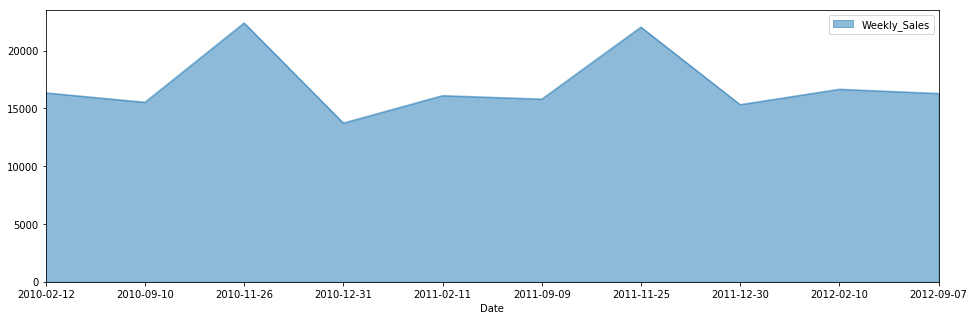

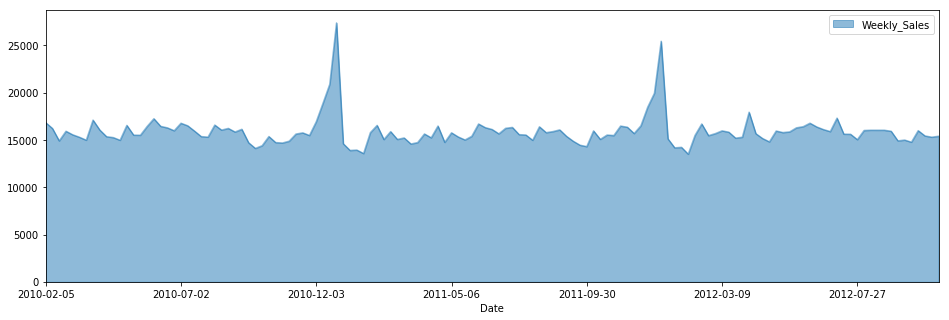

In [617]:
plt.figure(figsize = (14,5), linewidth = 3.5)
feriado.plot.area(stacked = False, figsize = (16,5), legend = 'Vendas')
feriado.plot.area(stacked = False, figsize = (16,5), legend = 'Vendas')

## **Bônus**

**Compare os gráficos obtidos nos exercício 1, 2 e 3 com métricas externas que você julgue relevante. Alguns exemplos de métricas externas foram citados anteriormente e você pode usá-las como um ponto de partida.**

**As lojas de melhor performance são mais vulneráveis às condições macroeconômicas que a média? E as lojas de pior performance?**

Estou em período de provas, essa vai ficar pra depois :/
    
O que eu tinha em mente era observar a evolução da taxa de desemprego do país do período e verificar se houve ou não oscilações consideráveis na compra geral e/ou por departameto. Seria mais interessante se desse para dividir as vendas por estado, mas não seria possível com essa base de dados.